# Análisis de la evaluación de graduandos 2019 (datos del ministerio de educacion)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline

SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
rcParams['figure.figsize'] = 16,8


# Modelos de machine learning simples

### Carguemos los datos de nuestras variables independientes en X y de nuestras etiquetas de Logro/No logro (0/1) en y

In [3]:
datos = pd.read_csv('data/graduandos_2019_filtrado.csv',index_col=0, dtype='category')

In [4]:
X = datos[datos.columns[:-2]]
y = datos['Logro_Mate'] #.astype('category')

### Ahora dividamos los datos en dos partes, una parte seran los datos de entrenamiento y la otra seran datos de prueba que seran utilizadas para medir el rendimiento del modelo

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =502, stratify=y)

### Porque los datos son muy grandes, hago un submuestreo para que algunos de los analisis sean mas rapidos

In [46]:
 from sklearn.utils import resample

In [52]:
X_test.shape

(47196, 127)

In [67]:
X_sub, y_sub = resample(X_test,y_test, n_samples=int(X_test.shape[0]*0.10),random_state=502, stratify=y_test)
print(X_sub.shape)

(4719, 127)


## Decision Trees

In [7]:
from sklearn import tree

In [8]:
modelo_dt = tree.DecisionTreeClassifier(random_state=502)
modelo_dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=502)

## Veamos el rendimiento del modelo con los datos de prueba

In [9]:
y_pred =  modelo_dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89     40797
         1.0       0.32      0.36      0.34      6399

    accuracy                           0.81     47196
   macro avg       0.61      0.62      0.61     47196
weighted avg       0.82      0.81      0.81     47196



In [10]:
print('Numero de nodos: {}'.format(modelo_dt.tree_.node_count))
print('Maxima profundidad: {}'.format(modelo_dt.tree_.max_depth))

Numero de nodos: 24265
Maxima profundidad: 35


[Text(446.4, 380.52, 'Fm_Grado_Alcanzo_Mama_RECO <= 2.5\n0.234\n110122\n[95192, 14930]\nNo logro'),
 Text(223.2, 271.8, 'Mate_Periodos_Matematicas_Semana_RECO <= 2.5\n0.155\n81642\n[74753, 6889]\nNo logro'),
 Text(111.6, 163.07999999999998, 'Sexo_Reco <= 0.5\n0.093\n42863\n[40768, 2095]\nNo logro'),
 Text(55.8, 54.360000000000014, '\n  (...)  \n'),
 Text(167.39999999999998, 54.360000000000014, '\n  (...)  \n'),
 Text(334.79999999999995, 163.07999999999998, 'Computadoras <= 0.5\n0.217\n38779\n[33985, 4794]\nNo logro'),
 Text(279.0, 54.360000000000014, '\n  (...)  \n'),
 Text(390.59999999999997, 54.360000000000014, '\n  (...)  \n'),
 Text(669.5999999999999, 271.8, 'Mate_Periodos_Matematicas_Semana_RECO <= 4.5\n0.405\n28480\n[20439, 8041]\nNo logro'),
 Text(558.0, 163.07999999999998, 'Cod_Indicadores <= 1.5\n0.294\n14867\n[12210, 2657]\nNo logro'),
 Text(502.2, 54.360000000000014, '\n  (...)  \n'),
 Text(613.8, 54.360000000000014, '\n  (...)  \n'),
 Text(781.1999999999999, 163.07999999999

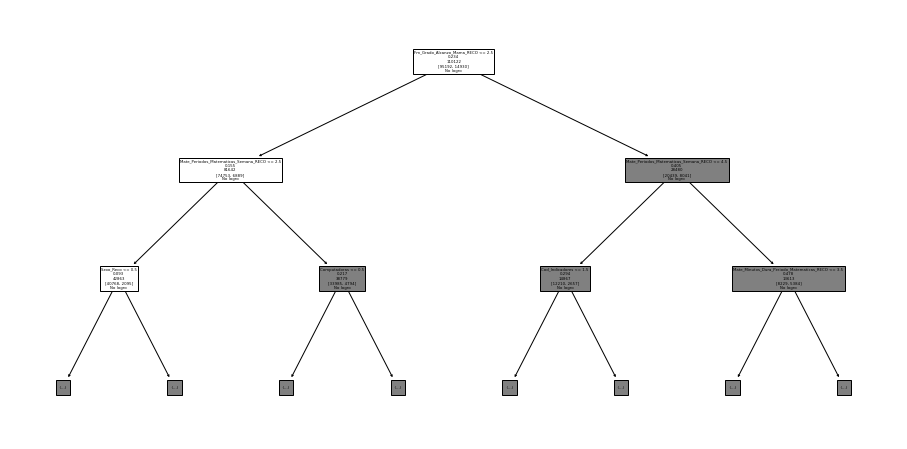

In [11]:
tree.plot_tree(modelo_dt, label=None, feature_names=X.columns, max_depth=2, class_names=['No logro', 'Logro'])

## Random Forests

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
modelo_rf = RandomForestClassifier(n_estimators=25, random_state=502, class_weight='balanced_subsample')
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=25,
                       random_state=502)

In [31]:
y_pred_rf =  modelo_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.93     40797
         1.0       0.69      0.21      0.32      6399

    accuracy                           0.88     47196
   macro avg       0.79      0.60      0.63     47196
weighted avg       0.86      0.88      0.85     47196



## Importancia de variables basada en impureza

Mientras más alto el valor, más importante es la variable.
La importancia de la variable es calculada como la reducción total (normalizada) del criterio traida por esa variable. 
Es conocida como importancia Gini

In [97]:
importancias = modelo_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in modelo_rf.estimators_],
             axis=0)
indices = np.argsort(importancias)[::-1]

# Imprimir el ranking the variables
print("Ranking de variables:")
for f in range(min(20,X.shape[1])):
    print("%d. Variable %s (%f)" % (f + 1, X.columns[indices[f]], importancias[indices[f]]))

Ranking de variables:
1. Variable Mate_Periodos_Matematicas_Semana_RECO (0.056427)
2. Variable Fm_Grado_Alcanzo_Mama_RECO (0.036651)
3. Variable Fm_Grado_Alcanzo_Papa_RECO (0.035614)
4. Variable Edad_Reco (0.034721)
5. Variable Cod_Depa (0.034629)
6. Variable Tec_Periodos_Semana_Utiliza_Computadora_RECO (0.032332)
7. Variable Mate_Minutos_Dura_Periodo_Matematicas_RECO (0.026387)
8. Variable Tec_Horas_Diarias_Uso_Compu_Casa_RECO (0.026346)
9. Variable Lect_Minutos_Dura_Periodo_Lectura_RECO (0.022824)
10. Variable Cod_Region (0.022620)
11. Variable Lect_Periodos_Lectura_Semana_RECO (0.022446)
12. Variable Lect_Dias_Semana_Lee_Periodicos_RECO (0.020620)
13. Variable Lavadora_Ropa (0.019528)
14. Variable Tec_Horas_Diarias_Uso_Compu_Estab_RECO (0.018612)
15. Variable Sexo_Reco (0.018316)
16. Variable Cod_Jornada (0.018187)
17. Variable Lect_Libros_Completos_Ha_Leido_RECO (0.017319)
18. Variable CC_Servicio_Internet (0.016988)
19. Variable Cod_Rama_Abstracta (0.016978)
20. Variable Ed_Jornad

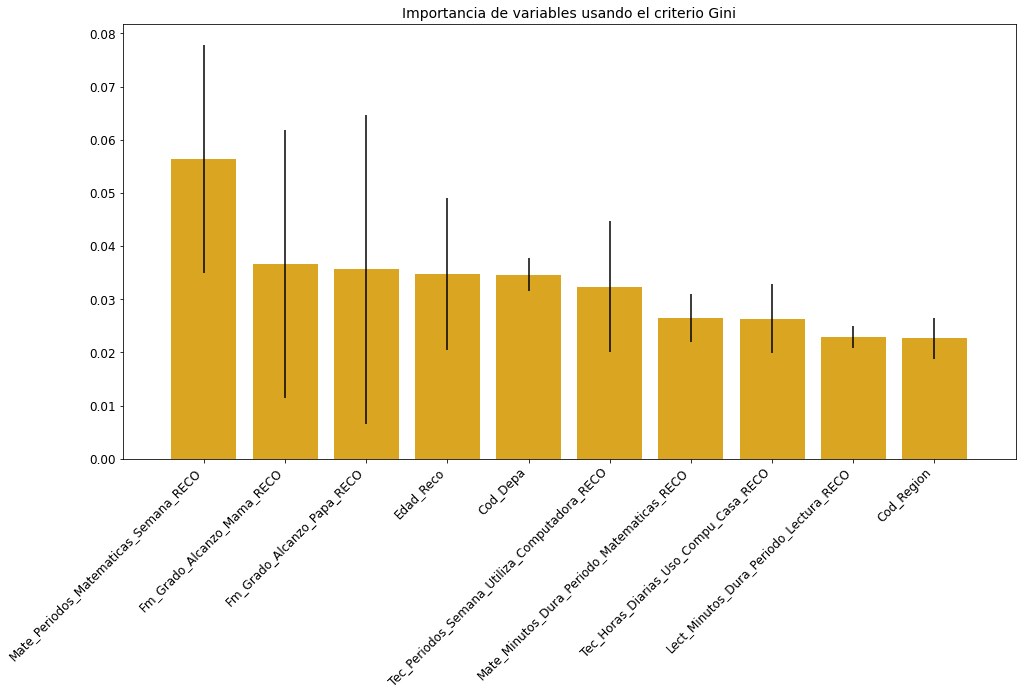

In [125]:
# Plot the impurity-based feature importances of the forest
max_numero_atributos = 10
plt.figure()
plt.title("Importancia de variables usando el criterio Gini")
plt.bar(range(max_numero_atributos), importancias[indices][0:max_numero_atributos],
        color="goldenrod", yerr=std[indices][0:max_numero_atributos], align="center")
plt.xticks(range(max_numero_atributos), X.columns[indices][0:max_numero_atributos], rotation=45, ha='right')
plt.xlim([-1, max_numero_atributos])
plt.show()

## Importancia de variable basada en permutación

En este método la importancia de la variable se mide calculando el incremento en el error de predicción del modelo después de permutar aleatoriamente los valores de la variable

In [106]:
from sklearn.inspection import permutation_importance

In [108]:
importancia_perm = permutation_importance(modelo_rf, X_sub, y_sub, n_jobs=3, random_state=502)

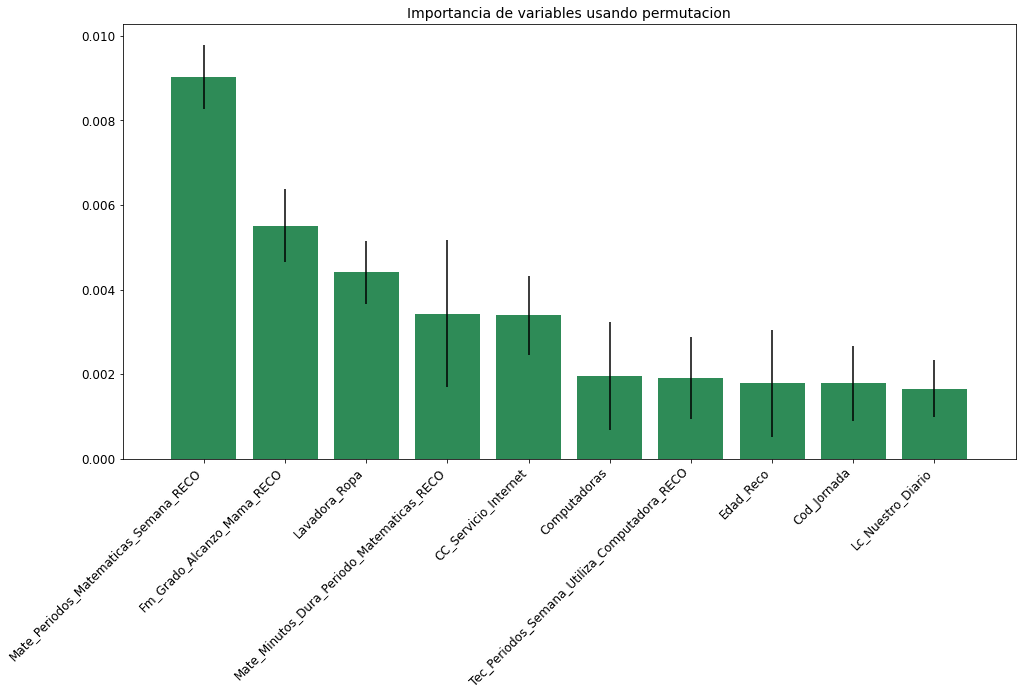

In [124]:
indices_perm = np.argsort(importancia_perm['importances_mean'])[::-1]

plt.figure()
plt.title("Importancia de variables usando permutacion")
plt.bar(range(max_numero_atributos), importancia_perm['importances_mean'][indices_perm][0:max_numero_atributos],
        color="seagreen", yerr=importancia_perm['importances_std'][indices_perm][0:max_numero_atributos], align="center")
plt.xticks(range(max_numero_atributos), X_sub.columns[indices_perm][0:max_numero_atributos], rotation=45, ha='right')
plt.xlim([-1, max_numero_atributos])
plt.show()

## XGBoost

In [34]:
from xgboost import XGBClassifier, plot_importance
import math

In [35]:
modelo_xgb = XGBClassifier(n_estimators=50, random_state=502, scale_pos_weight= math.sqrt(7.96))
modelo_xgb.fit(X_train.astype('double'), y_train)

XGBClassifier(n_estimators=50, random_state=502,
              scale_pos_weight=2.821347195933177)

In [36]:
y_pred_xgb =  modelo_xgb.predict(X_test.astype('double'))
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     40797
         1.0       0.48      0.47      0.47      6399

    accuracy                           0.86     47196
   macro avg       0.70      0.69      0.70     47196
weighted avg       0.86      0.86      0.86     47196



## Importancia basada en ganacia de información

La importancia es calculada con el promedio de la ganancia de información obtenida al usar dicha variable en la ramificación de los árboles conformados en el ensamblado.

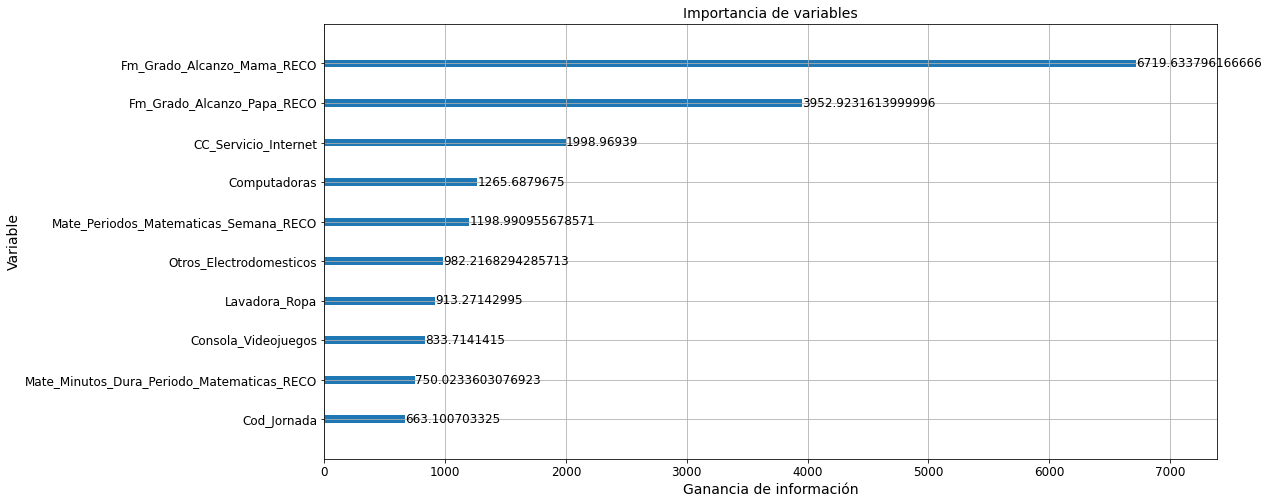

In [105]:
plot_importance(modelo_xgb, importance_type="gain", max_num_features=max_numero_atributos, title="Importancia de variables", xlabel="Ganancia de información", ylabel="Variable")
plt.show()

# CatBoost

In [40]:
from catboost import CatBoostClassifier

In [43]:
cat_features = list(range(0, X_train.shape[1]))
modelo_ctb = CatBoostClassifier(n_estimators=25, cat_features=cat_features, random_state=502,scale_pos_weight= math.sqrt(7.96))
modelo_ctb.fit(X_train, y_train, cat_features=cat_features)

Learning rate set to 0.5
0:	learn: 0.5740115	total: 67ms	remaining: 1.61s
1:	learn: 0.5178247	total: 147ms	remaining: 1.69s
2:	learn: 0.5010717	total: 235ms	remaining: 1.72s
3:	learn: 0.4905990	total: 315ms	remaining: 1.65s
4:	learn: 0.4848142	total: 361ms	remaining: 1.44s
5:	learn: 0.4751543	total: 428ms	remaining: 1.35s
6:	learn: 0.4689877	total: 522ms	remaining: 1.34s
7:	learn: 0.4648824	total: 567ms	remaining: 1.21s
8:	learn: 0.4616405	total: 627ms	remaining: 1.11s
9:	learn: 0.4592194	total: 690ms	remaining: 1.03s
10:	learn: 0.4569377	total: 764ms	remaining: 973ms
11:	learn: 0.4551109	total: 850ms	remaining: 921ms
12:	learn: 0.4538269	total: 937ms	remaining: 865ms
13:	learn: 0.4507752	total: 987ms	remaining: 776ms
14:	learn: 0.4494179	total: 1.08s	remaining: 719ms
15:	learn: 0.4468951	total: 1.16s	remaining: 653ms
16:	learn: 0.4451455	total: 1.24s	remaining: 583ms
17:	learn: 0.4440416	total: 1.3s	remaining: 507ms
18:	learn: 0.4425314	total: 1.35s	remaining: 428ms
19:	learn: 0.44142

In [44]:
y_pred_ctb =  modelo_ctb.predict(X_test)
print(classification_report(y_test, y_pred_ctb))

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91     40797
         1.0       0.47      0.54      0.50      6399

    accuracy                           0.85     47196
   macro avg       0.70      0.72      0.71     47196
weighted avg       0.86      0.85      0.86     47196



# Explicando mas a fondo el modelo de Machine Learning

## Usando Valores Shap

In [45]:
import shap
shap.initjs()

### Buscando instancias para explicar con Logro y No Logro

In [69]:
y_pred_ctb_sub = modelo_ctb.predict(X_sub)
print("Indice de algunos estudiantes con Logro")
for i in range(50):
    if y_pred_ctb_sub[i]=='1.0':
        print(i)

Indice de algunos estudiantes con Logro
2
5
13
26
36
48


Creamos el explicador

In [57]:
explicador = shap.TreeExplainer(modelo_ctb)
valores_shap = explicador.shap_values(X_sub)

In [71]:
i = 13
print('Valor real: {}, Prediccion: {}'.format(y_sub[i], y_pred_ctb_sub[i]))
shap.force_plot(explicador.expected_value, explicador.shap_values([X_sub.iloc[i]]), X_sub.iloc[i], link='logit')

Valor real: 1.0, Prediccion: 1.0


In [72]:
i = 15
print('Valor real: {}, Prediccion: {}'.format(y_sub[i], y_pred_ctb_sub[i]))
shap.force_plot(explicador.expected_value, explicador.shap_values([X_sub.iloc[i]]), X_sub.iloc[i], link='logit')

Valor real: 0.0, Prediccion: 0.0


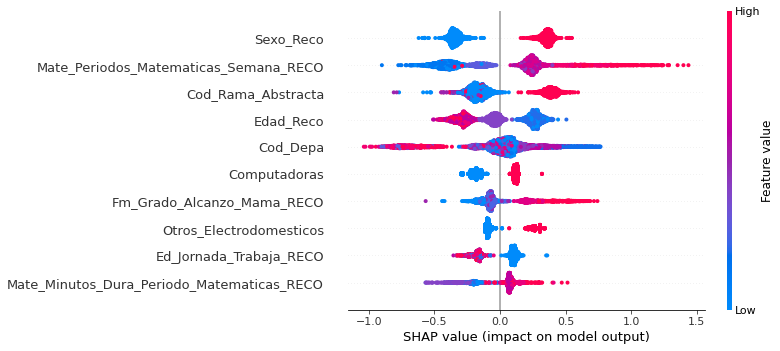

In [73]:
shap.summary_plot(valores_shap, X_sub, show = False, max_display=max_numero_atributos)

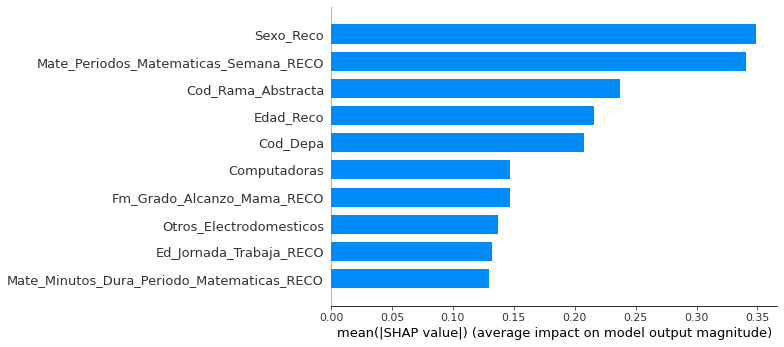

In [74]:
shap.summary_plot(valores_shap, X_sub, plot_type="bar", max_display=max_numero_atributos)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


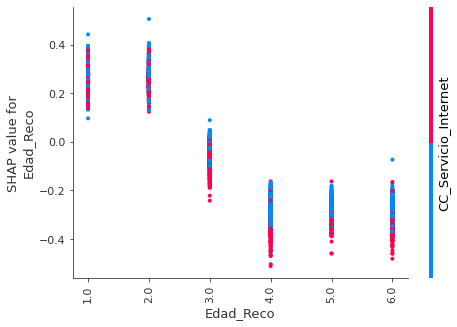

In [75]:
shap.dependence_plot("Edad_Reco", valores_shap, X_sub)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


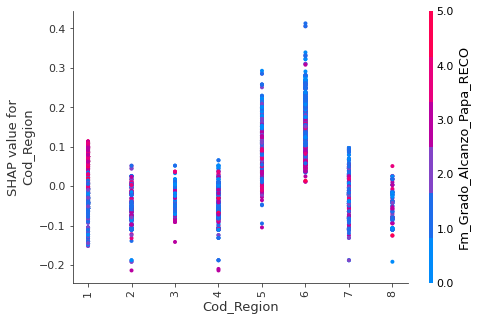

In [76]:
shap.dependence_plot("Cod_Region", valores_shap, X_sub)

# Lime

In [77]:
import lime
import lime.lime_tabular

In [91]:
explicador_lime = lime.lime_tabular.LimeTabularExplainer(X_sub.to_numpy(dtype=float), feature_names=X_sub.columns, class_names=['No logro', 'Logro'])


In [92]:
i=36
exp = explicador_lime.explain_instance(X_sub.iloc[i].astype(float), modelo_rf.predict_proba, num_features=6)
exp.show_in_notebook(show_table=True, show_all=False)

In [84]:
i=35
exp = explicador_lime.explain_instance(X_sub.iloc[i].astype(float), modelo_rf.predict_proba, num_features=6)
exp.show_in_notebook(show_table=True, show_all=False)